In [1]:
!pip install japanize-matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# ロジスティック回帰（logistic regression）

N次元，M個のデータを考える．（今回は二値分類問題を考えるので，yは１か０のどちらかの値を取る．）
$$
X =
\begin{pmatrix}
    \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N
\end{pmatrix}
，
\mathbf{w} =
\begin{pmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_N
\end{pmatrix}
，
\mathbf{b} =
\begin{pmatrix}
    b \\
    b \\
    \vdots \\
    b
\end{pmatrix}
，
\mathbf{y} =
\begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_M
\end{pmatrix}
$$

これの，まずは重み付き線形和を考える．

$$
\hat{\mathbf{y}} = X\mathbf{w}+\mathbf{b}
$$

そして，**シグモイド（sigmoid）**関数によって，$\hat{\mathbf{y}}$を０〜１の間にマッピングする．

$$
シグモイド関数 \\
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma(\hat{\mathbf{y}}) = \sigma(X\mathbf{w}+\mathbf{b}) = \hat{p}(\mathbf{w}, \mathbf{b})
$$

コレで予測値が得られたので，後は真の値との比較を**クロスエントロピー誤差**によって比較する．（下は，kクラス分類の例）

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}(\mathbf{w}, \mathbf{b}))
$$

## クロスエントロピー誤差

二つの分布間の類似度を測る指標．

例えば，ある画像データが犬の画像なのか猫の画像なのかを分類する問題を考えよう．

正解ラベルとしては，以下のようになっているだろう．（犬を０，猫を１として）

１番目のデータサンプル: {犬} = {0} \
２番目のデータサンプル: {犬} = {0} \
３番目のデータサンプル: {犬} = {1} \
. \
. \
.

一方で，シグモイド関数は確率を表していると見做せた．
よって，ロジスティック回帰モデルの予測値は次のようになっているだろう．

１番目のデータサンプルによる予測値: {犬である確率} \
２番目のデータサンプルによる予測値: {犬である確率} \
３番目のデータサンプルによる予測値: {犬である確率} \
. \
. \
.

例えば，３番目のデータサンプルを考えてみよう．

下の図を見てほしい．

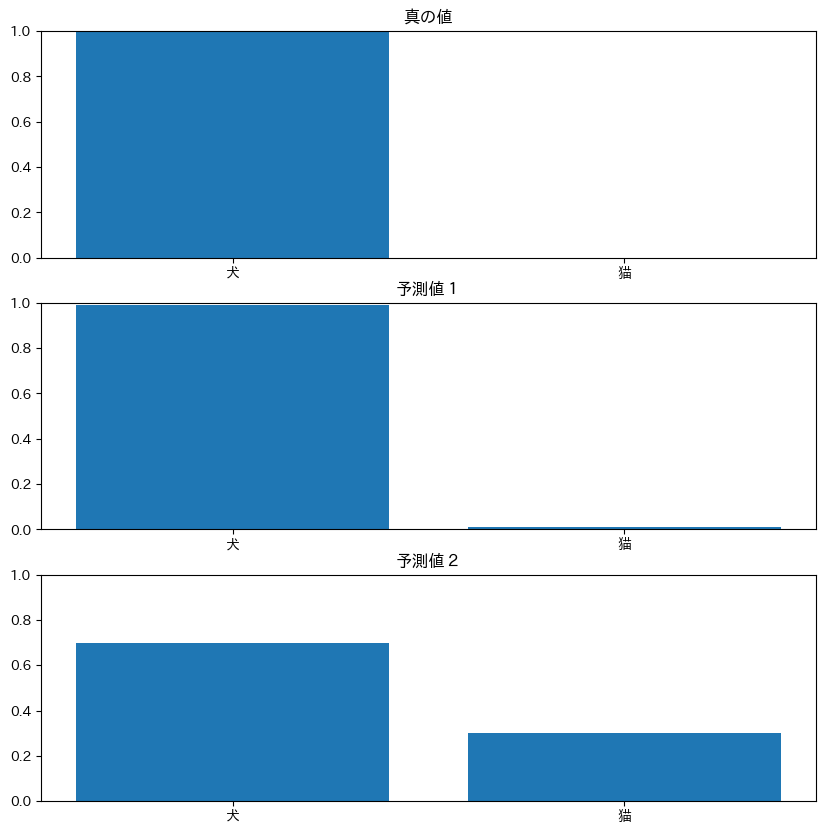

In [2]:
#@title 真の値とロジスティック回帰モデルの予測値の比較
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

fig ,ax = plt.subplots(3, 1, figsize=(10,10))

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax1.set_title("真の値")
ax1.set_ylim(0, 1)
ax2.set_title("予測値１")
ax2.set_ylim(0, 1)
ax3.set_title("予測値２")
ax3.set_ylim(0, 1)
ax1.bar(["犬", "猫"], [1, 0])
ax2.bar(["犬", "猫"], [0.99, 0.01])
ax3.bar(["犬", "猫"], [0.7, 0.3])
plt.show()

上記の例だとどちらの予測値が良さそう？

→パラメータを変化させて確率を元の分布に寄せる，ということを行う．

元の分布に似ているかどうか

→クロスエントロピー誤差

（例）２クラス分類の場合

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{i=1}^{M} \sum_{j=1}^{2}p_{ij}log(\hat{p}_{ij}) \\
&= -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+p_{i2}log(\hat{p}_{i2}) \\
&= -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+(1-p_{i1})log(1-\hat{p}_{i1}) \,\,\, ∵p_{i1} + p_{i2} = 1
\end{align}
$$

上の式は，クラス１に対応する真の値と予測値を比較，クラス2に対応する真の値と予測値を比較し，

そしてそれらを全てのデータに対して足し合わせるということをおこなっている．

実際に予測値１の分布の方が真の値の分布に近くなっていることを確認しよう．

In [3]:
def np_log(x):
    """
    log関数のオーバーフローを防ぐ実装，clipで値を制限
    """
    return np.log(np.clip(x, 1e-10, 1e+10))

def sigmoid(x):
    # 単純な実装
    # return 1 / (1 + np.exp(-x))

    # expのoverflow対策を施した実装
    # x >=0 のとき sigmoid(x) = 1 / (1 + exp(-x))
    # x < 0 のとき sigmoid(x) = exp(x) / (1 + exp(x))
    return np.exp(np.minimum(x, 0)) / (1 + np.exp(- np.abs(x)))

def cross_entropy(y_hat, y):
    # WRITE ME
    # return -(y @ np_log(y_hat)).mean()
    return (- y * np_log(y_hat) - (1 - y) * np_log(1 - y_hat)).mean()

# y = np.array([1, 0])
# y_hat_1 = np.array([0.99, 0.01])
# y_hat_2 = np.array([0.7, 0.3])

y = np.array([1])
y_hat_1 = np.array([0.99])
y_hat_2 = np.array([0.7])

print("予測値１のクロスエントロピー誤差：{:.3f}".format(cross_entropy(y_hat_1, y)))
print("予測値２のクロスエントロピー誤差：{:.3f}".format(cross_entropy(y_hat_2, y)))

予測値１のクロスエントロピー誤差：0.010
予測値２のクロスエントロピー誤差：0.357


## コスト関数（クロスエントロピー誤差）の微分

準備：微分の公式
$$
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma^\prime(x) = (1-\sigma(x))\sigma(x) \\
log(x)^\prime = \frac{1}{x} \\
log(f(x))^\prime = \frac{f^\prime(x)}{f(x)}
$$

コスト関数を微分する．
$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂\mathbf{w}} &= \frac{∂}{∂\mathbf{w}} (-\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}))\\
&= -\frac{1}{M}\sum_{m=1}^{M} \frac{∂}{∂\mathbf{w}} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+b))+(1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+b)))
\end{align}
$$

$n$番目のパラメータについて考える．

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂w_n} &= \frac{∂}{∂w_n} (-\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}))\\
&= -\frac{1}{M}\sum_{m=1}^{M} \frac{∂}{∂w_n} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+b))+(1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+b))) \\
\frac{∂}{∂w_n} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+\mathbf{b}))
&= p_{m1}\frac{∂}{∂w_n} (log(\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))\\
&= p_{m1}\frac{\sigma^\prime(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)}{\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= \frac{p_{m1}x_{mn}(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))(\sigma(\mathbf{x}_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)))}{\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= p_{m1}x_{mn}(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)) \\
&= p_{m1}x_{mn}(1-\hat{p}_{m1})\\
\frac{∂}{∂w_n} ((1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+\mathbf{b}))
&= (1-p_{m1})\frac{∂}{∂w_n} (log(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))\\
&= -(1-p_{m1})\frac{\sigma^\prime(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)}{1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= \frac{-(1-p_{m1})x_{mn}(1-\sigma(\mathbf{x}_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))(\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)))}{1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= -(1-p_{m1})x_{mn}\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b) \\
&= -(1-p_{m1})x_{mn}\hat{p}_{m1} \\
\end{align}
$$
よって，
$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂w_n} &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}x_{mn}(1-\hat{p}_{m1}) - (1-p_{m1})x_{mn}\hat{p}_{m1}\\
&= -\frac{1}{M}\sum_{m=1}^{M} x_{mn}(p_{m1} - \hat{p}_{m1})\\
&= -\frac{1}{M}x_n^T\delta\\
\end{align}
$$

これを，$n=1 → n=N$まで考えれば良い．

すなわち，

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂\mathbf{w}} &= -\frac{1}{M}X^T\delta\\
\end{align}
$$

次に$b$について考える．
bの係数が１になっていると捉えれば良いから
$$
\frac{∂J}{∂b} = -\frac{1}{M}\mathbf{1}^T\delta = -\bar{\delta}
$$

これを元に勾配降下法のアルゴリズムを書く．

In [4]:
# まずはLogisticRegression()というクラスを定義しよう。
# WRITE ME
class LogisticRegression():
    pass

In [5]:
# 初期化メソッド(__init__())を定義しよう。
# 引数は入力の次元
# self.w, self.bという属性名で重みを初期化する
# wはランダムな一様分布からサンプリング（np.random.uniform(low=-0.08, high=0.08, size=(n_dims, 1)).astype("float64")）
# bはなんでも良いので，０を初期値とする。

class LogisticRegression():
    def __init__(self, n_dims):
        """
        n_dims: 入力の次元
        """
        # WRITE ME
        # Xavier, He
        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0
lr_test = LogisticRegression(n_dims=5)
print(lr_test.w)
print(lr_test.b)

[[-0.05508726]
 [-0.01478911]
 [-0.03193578]
 [ 0.02886617]
 [ 0.00428814]]
0


$$
シグモイド関数 \\
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma(\hat{\mathbf{y}}) = \sigma(X\mathbf{w}+\mathbf{b}) = \hat{p}(\mathbf{w}, \mathbf{b})
$$

In [6]:
# 次に，予測値を得るためのpredict()メソッドを実装しよう
# 予測値はxとする
# ヒント；重み付き線形和をシグモイド関数に入力する。

class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def predict(self, X):
        y_hat = X @ self.w + self.b
        p_hat = sigmoid(y_hat)
        return p_hat
lr_test = LogisticRegression(n_dims=5)
x = np.array([[1, 2, 3, 4, 5]])
lr_test.predict(x)

array([[0.70931191]])

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+(1-p_{i1})log(1-\hat{p}_{i1}) \,\,\, ∵p_{i1} + p_{i2} = 1
$$

In [7]:
# さらに，costメソッドを定義しよう．今回はクロスエントロピー誤差を用いるのでそれを実装する．

class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def cost(self, X, y):
        """
        X: 特徴量
        y: 正解データ
        """
        #WRITE ME
        y_hat = self.predict(X)
        return cross_entropy(y_hat, y)

    def predict(self, X):
        y_hat = X @ self.w + self.b
        p_hat = sigmoid(y_hat)
        return p_hat
lr_test = LogisticRegression(n_dims=5)
x = np.array([[1, 2, 3, 4, 5],
              [-1, -2, -3, -4, -5]])
y = np.array([[1],
              [0]])
lr_test.cost(x, y)

0.5791104579698464

$$
\frac{∂J}{∂\mathbf{w}} = -\frac{1}{M}X^T\delta \\
\frac{∂J}{∂b} = -\frac{1}{M}\mathbf{1}^T\delta = -\bar{\delta}
$$


In [8]:
# 最後に，勾配を元にパラメータを更新するupdateメソッドを定義しよう．
class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def cost(self, X, y):
        y_hat = self.predict(X)
        return (- y * np_log(y_hat) - (1 - y) * np_log(1 - y_hat)).mean()

    def update(self, X, y, alpha):
        #WRITE ME
        y_hat = self.predict(X).reshape(-1, 1)
        y = y.reshape(-1, 1)
        delta = y - y_hat

        dw = -X.T @ delta / X.shape[0]
        db = -delta.mean()
        self.w -= alpha * dw
        self.b -= alpha * db

        J = self.cost(X, y)
        return J

    def predict(self, X):
        return np.exp(np.minimum(X @ self.w + self.b, 0)) / (1 + np.exp(- np.abs(X @ self.w + self.b)))

In [9]:
#バッチ学習
x_train_or = np.array([[0, 1], [1, 0], [0, 0], [1, 1]]) # ( 4, 2 )
y_train_or = np.array([[1], [1], [0], [1]])
x_valid_or, y_valid_or = x_train_or, y_train_or

batch_size = x_train_or.shape[0]
alpha = 1.

iter = int(x_train_or.shape[0]/batch_size)
epochs = 100
np.random.seed(1)
logreg = LogisticRegression(n_dims=x_train_or.shape[1])

# 描画のための配列を用意
_ = [i+1 for i in range(iter*epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(x_train_or.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = x_train_or[idx][:]
        _y = y_train_or[idx][:]
        c = logreg.update(_X, _y, alpha=alpha)
        cost_J.append(c)
    print("EPOCH: {}, cost: {}".format(epoch, c))

EPOCH: 0, cost: 0.5375155145227546
EPOCH: 1, cost: 0.47257294732894917
EPOCH: 2, cost: 0.4374613230226619
EPOCH: 3, cost: 0.4144246200214745
EPOCH: 4, cost: 0.39707609346636813
EPOCH: 5, cost: 0.3827712734568355
EPOCH: 6, cost: 0.3702868089444634
EPOCH: 7, cost: 0.35900598913490017
EPOCH: 8, cost: 0.3485951518864438
EPOCH: 9, cost: 0.338861977647638
EPOCH: 10, cost: 0.32968858217734487
EPOCH: 11, cost: 0.32099802425400425
EPOCH: 12, cost: 0.3127367554203056
EPOCH: 13, cost: 0.3048650845298153
EPOCH: 14, cost: 0.29735184354585553
EPOCH: 15, cost: 0.2901713300385303
EPOCH: 16, cost: 0.2833015164450674
EPOCH: 17, cost: 0.2767229790482552
EPOCH: 18, cost: 0.2704182427063637
EPOCH: 19, cost: 0.26437136898248226
EPOCH: 20, cost: 0.2585676883956912
EPOCH: 21, cost: 0.2529936189211645
EPOCH: 22, cost: 0.2476365367072512
EPOCH: 23, cost: 0.2424846788760781
EPOCH: 24, cost: 0.2375270664500258
EPOCH: 25, cost: 0.23275344028473863
EPOCH: 26, cost: 0.22815420576159495
EPOCH: 27, cost: 0.22372038369

In [10]:
print(logreg.predict(x_valid_or))

[[0.92783813]
 [0.92763728]
 [0.18612595]
 [0.99861446]]


In [11]:
from sklearn.datasets import load_breast_cancer # 乳がんのデータセット
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

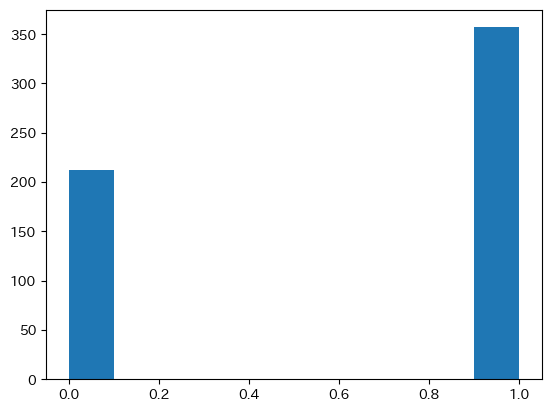

In [13]:
plt.hist(cancer.target)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [26]:
# モデルのインスタンスを生成
logreg = LogisticRegression(n_dims=X_train.shape[1])

# バッチサイズを指定
batch_size = 6 #X_train.shape[0]

# 学習率を指定
alpha = 0.0001
# alpha = 0.00001

# epoch数を指定
epochs = 100

# 乱数シードを固定
np.random.seed(1)

# 描画のための配列を用意
iter = int(X_train.shape[0]/batch_size)
_ = [i+1 for i in range(epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(X_train.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = X_train[idx][:]
        _y = y_train[idx][:]
        c = logreg.update(_X, _y, alpha=alpha)
    cost_J.append(np_log(c))
    if epoch % 10 == 9:
        print("EPOCH: {}, cost: {}".format(epoch+1, c))
    # if epoch == 50 :
    #      alpha /= 1000

EPOCH: 10, cost: 2.5034928961251155
EPOCH: 20, cost: 0.0001936485749339115
EPOCH: 30, cost: 0.0011007792512691093
EPOCH: 40, cost: 1.8503717077085953e-16
EPOCH: 50, cost: 0.003930989371383596
EPOCH: 60, cost: 1.4276708515423005e-08
EPOCH: 70, cost: 1.0017147321998023
EPOCH: 80, cost: 6.27614915376021e-06
EPOCH: 90, cost: 4.994663846190357e-09
EPOCH: 100, cost: 2.145381026269854


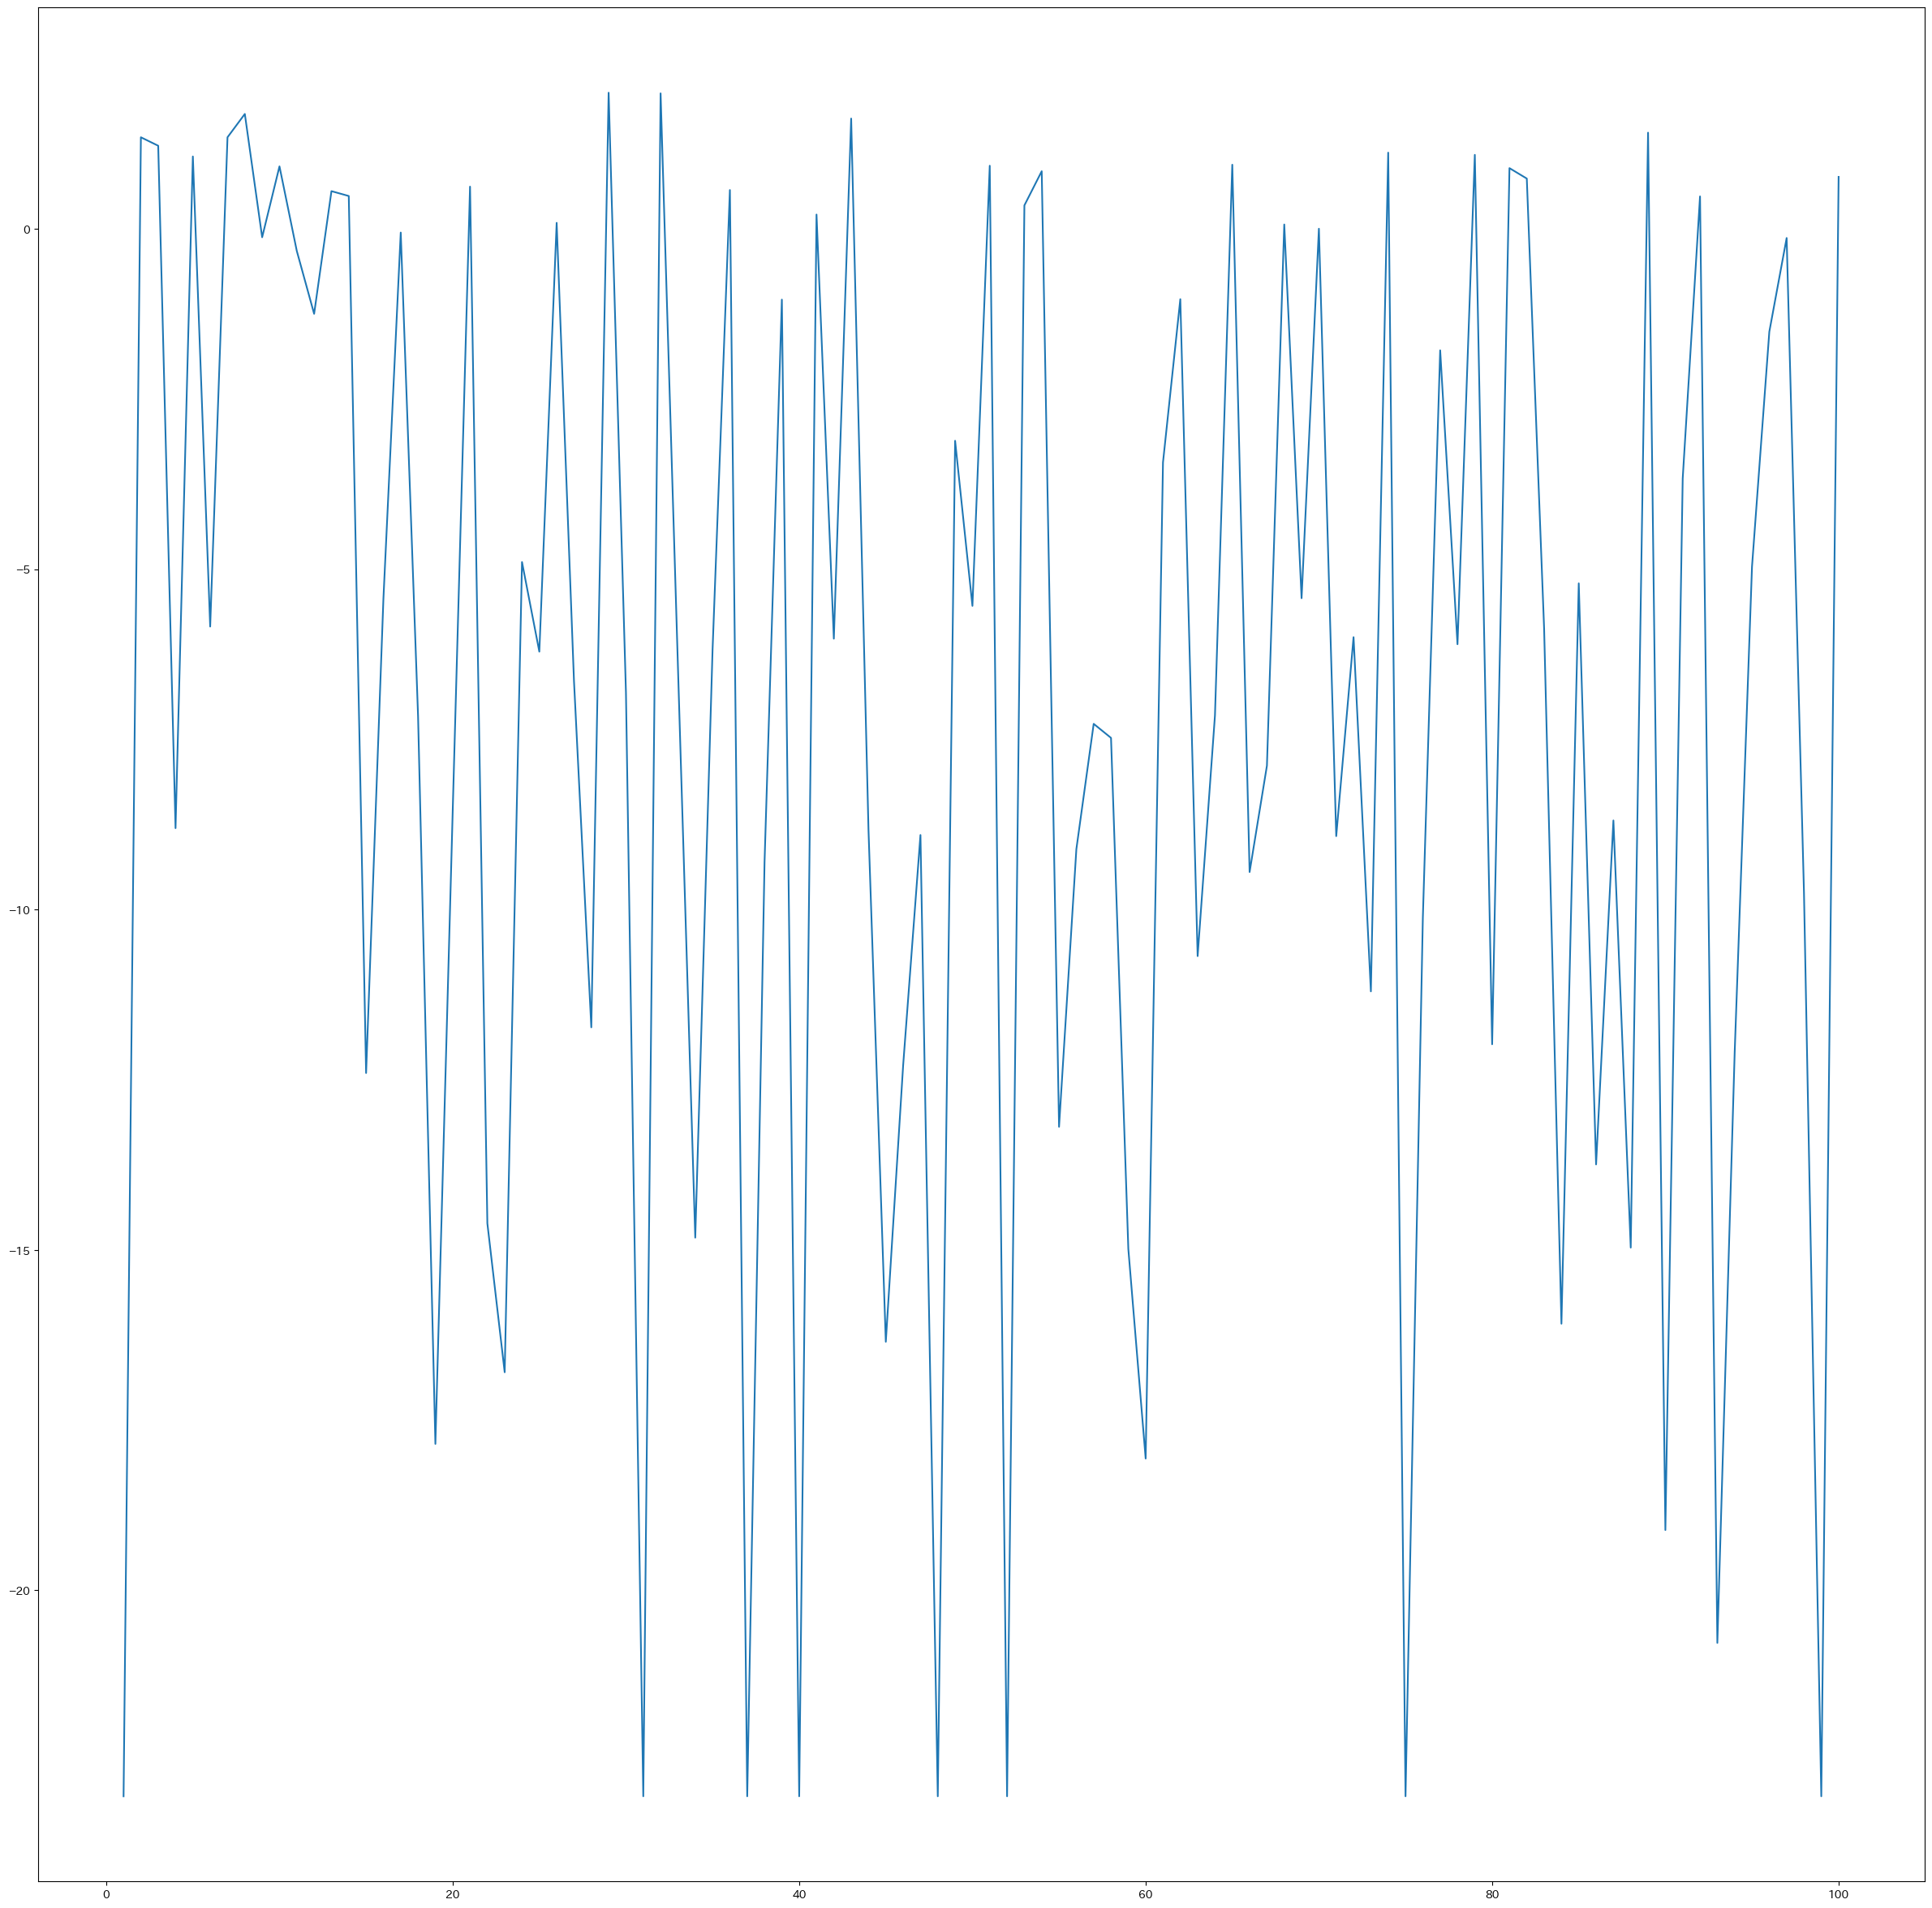

In [27]:
plt.figure(figsize=(30, 30))
plt.plot(_, cost_J)
plt.show()

In [28]:
y_pred = logreg.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(accuracy_score(y_test, y_pred))

0.916083916083916


In [29]:
#ロジスティック回帰クラスからインスタンス生成
sk_logreg = LR(max_iter=10000)
#sk_logreg_scaled = LR()
sk_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
print(f"訓練データ精度　=　{sk_logreg.score(X_train, y_train)}")
print(f"テストデータ精度　=　{sk_logreg.score(X_test, y_test)}")

訓練データ精度　=　0.960093896713615
テストデータ精度　=　0.965034965034965
